# Dogs v. Cats

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

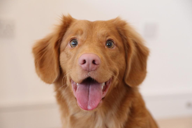

In [4]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192, 192))
im

In [5]:
#|export
# Using my model, I can make my app predict
learn = load_learner('model.pkl')

In [6]:
# Ask if the image I provided above is_cat
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 9.1280e-08]))

In [7]:
#|export
# Using gradio, I can build a simple category
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_image(im)

{'Dog': 0.9999998807907104, 'Cat': 9.127987965484863e-08}

In [9]:
# Using gradio library, I'm building my simple interface
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.png', 'cat.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.


KeyboardInterrupt: 

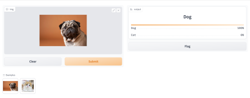

In [11]:
result = PILImage.create('result.png')
result.thumbnail((250, 250))
result